 # Message spam predictor
 
 # Using Naive bayes classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Project workflow

- Data cleaning
- EDA
- Text pre-processing
- Model building
- Evaluation
- Improvements
- Website
- Deploy

# Data cleaning


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [43]:
df = df.iloc[:,:2]

In [44]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df.sample(5)

# shows any random rows

,v1,v2
2226,ham,If you have belive me. Come to my home.
788,spam,"5 Free Top Polyphonic Tones call 087018728737,..."
1756,ham,Lmao ok I wont be needing u to do my hair anym...
1359,ham,&lt;#&gt; %of pple marry with their lovers... ...
3322,ham,"She said,'' do u mind if I go into the bedroom..."


In [46]:
# rename the columns

df = df.rename(columns={'v1':'target','v2':'text'})

In [47]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# lets convert the 'ham' and 'spam' into binary

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [49]:
df.target = encoder.fit_transform(df['target'])

In [50]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
# check for missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [52]:
df.duplicated().sum()

403

In [53]:
df.shape

(5572, 2)

In [55]:
df = df.drop_duplicates(keep='first')

In [56]:
df.shape

(5169, 2)

# EDA

In [57]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

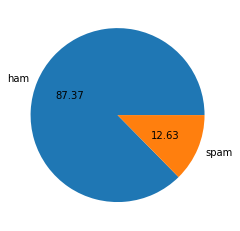

In [66]:
plt.pie(df.target.value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [69]:
# Data is imbalanced as False values are far more greater than True values
# True = 12.63
# False = 87.37

In [141]:
!pip install nltk

In [142]:
import nltk

# to count no of characters, words and sentences in a text message

In [151]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [74]:
# check for the characters in the message

df['no_characters'] = df.text.apply(len)

In [75]:
df.head()

,target,text,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [81]:
# no of words in the message

df['no_words'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [82]:
df.head()

,target,text,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [85]:
df['no_sentence'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [86]:
df.head()

,target,text,no_characters,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [87]:
df[['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [110]:
# spam
df[df['target'] == 0][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [109]:
# ham

df[df['target'] == 1][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [93]:
# lets check with visualization

<AxesSubplot:xlabel='no_characters', ylabel='Count'>

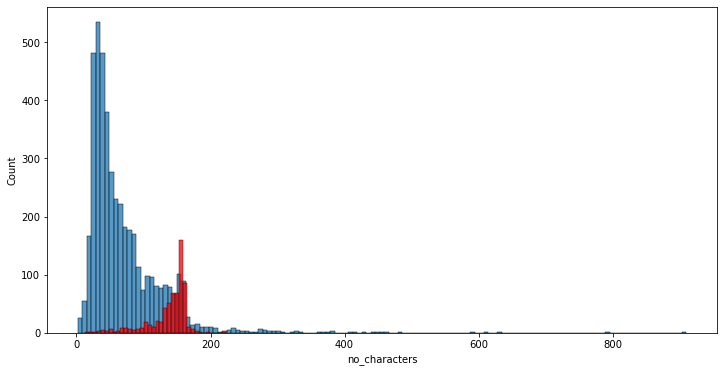

In [111]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['no_characters'])
sns.histplot(df[df['target'] == 1]['no_characters'], color='red')

In [112]:
# check for correlation

<AxesSubplot:>

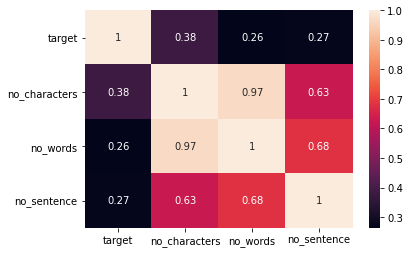

In [115]:
sns.heatmap(df.corr(),annot=True)

In [118]:
# no_characters has high correlation with the target

# collinearity found
# - no_characters and no_words -------- very high

# Data preprocessing
- Lower case
- Tokenization = splitting into words
- Removing special characters
- Removing stop words and punctuation
- Stemming = froms of verbs are converted into a single word 

In [185]:
def preprocess_data(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    li = []
    for i in text:
        if i.isalnum():
            li.append(i)
            
    text = li[:]  # clonning of list
    li.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            li.append(i)
            
    text = li[:]
    li.clear()
    
    for i in text:
        li.append(ps.stem(i))
        
            
    return ' '.join(li)

In [186]:
text = 'Hello there, HOW  !! %% Are ?? YOu DOING, playing doing,, hardeep Singh IS MY name congratulations you your not no yes'
preprocess_data(text)
#Hello there, HOW Are YOu DOING')

'hello play hardeep singh name congratul ye'

In [188]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('gaming')

'game'

In [157]:
# remove stop words

#from nltk.corpus import stopwords
#stopwords.words('english')

In [156]:
#import string
#string.punctuation

In [190]:
df['transformed_text'] =  df.text.apply(preprocess_data)

In [191]:
df.head()

,target,text,no_characters,no_words,no_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [226]:
#!pip install wordcloud

# it shows specific words in bigger size based on its frequency and importance

In [217]:
from wordcloud import WordCloud

ws = WordCloud(width=500,height=500, min_font_size=10, background_color='black')

In [208]:
spam_wc = ws.generate(df[df.target == 1]['transformed_text'].str.cat(sep = ' '))

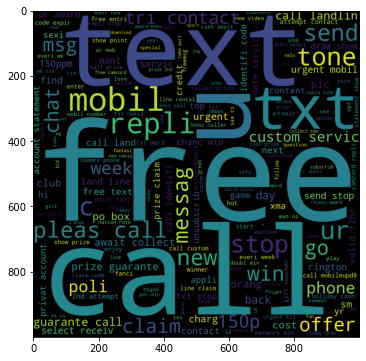

In [223]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [224]:
ham_wc = ws.generate(df[df.target == 0]['transformed_text'].str.cat(sep = ' '))

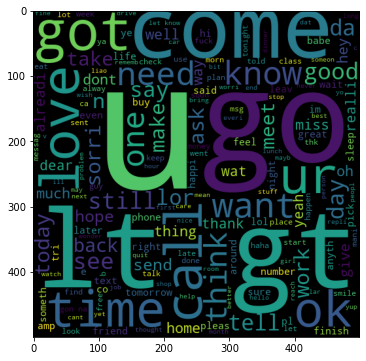

In [225]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [237]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [239]:
len(spam_corpus)

9941

In [227]:
# now, count the most frequent words

In [228]:
from collections import Counter

In [241]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [244]:
# convert teh above dictionary into a dataframe

In [245]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\DELL\.jupyter\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


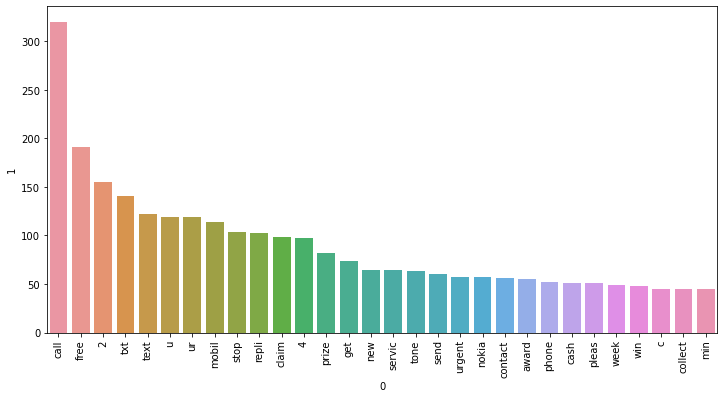

In [250]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [251]:
# lets do the same for ham messages

In [254]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [255]:
len(ham_corpus)

35303

In [257]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\DELL\.jupyter\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


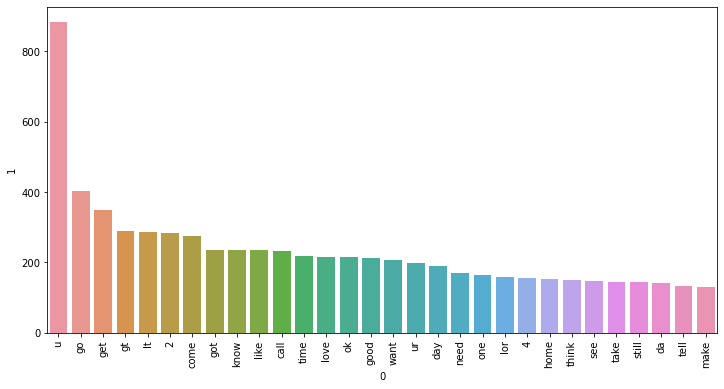

In [258]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building
- starting with naive bayes
- will include other classifiers as well

In [262]:
# we need to convert the 'transformed_text' column to numeric first

# Text vectorization using bag of words

In [263]:
df.head()

,target,text,no_characters,no_words,no_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


 # Vectorization
 1) Bag of words : Most simple of all the techniques out there. It involves three operations:
- Tokenization
- Vocabulary creation
- Vector creation

2) TF-IDF or Term Frequency–Inverse Document Frequency, is a numerical statistic that’s intended to reflect how important a word is to a document. Although it’s another frequency-based method, it’s not as naive as Bag of Words.




https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

In [387]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [388]:
X = tfidf.fit_transform(df.transformed_text).toarray()

In [389]:
X.shape

(5169, 3000)

In [390]:
y = df.target.values

In [391]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [392]:
# train test split

In [393]:
from sklearn.model_selection import train_test_split

In [394]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [395]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [396]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# GaussianNB

In [397]:
# Bag of words
gnb.fit(X_train,y_train)
pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


# MultinomialNB

In [398]:
mnb.fit(X_train,y_train)
pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


# BernoulliNB

In [376]:
bnb.fit(X_train,y_train)
pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# Vectorization technique = TFIDF 
# Model selected = MultinomialNB 

In [347]:
# lets compare our model with other ml algorithms

In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [378]:
lrc = LogisticRegression(solver='liblinear')
svc = SVC(kernel='sigmoid', gamma = 0.1)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
adc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [379]:
models = {
    'LRC' : lrc,
    'SVC' : svc,
    'MNB' : mnb,
    'DTC' : dtc,
    'KNC' : knc,
    'RFC' : rfc,
    'ADC' : adc,
    'BC' : bc,
    'ETC' : etc
}

In [380]:
def train_classifier(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    
    return accuracy, precision

In [383]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.971953578336557, 1.0)

In [386]:
accuracy_scores = []
precision_scores = []

for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model,X_train,y_train,X_test,y_test)
    
    print('For ',name)
    print('Accuracy ',current_accuracy)
    print('Precision ',current_precision)
    print('                              ')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LRC
Accuracy  0.9526112185686654
Precision  0.978494623655914
                              
For  SVC
Accuracy  0.9274661508704062
Precision  0.9701492537313433
                              
For  MNB
Accuracy  0.971953578336557
Precision  1.0
                              
For  DTC
Accuracy  0.9313346228239845
Precision  0.8252427184466019
                              
For  KNC
Accuracy  0.9052224371373307
Precision  1.0
                              
For  RFC
Accuracy  0.9758220502901354
Precision  0.9829059829059829
                              
For  ADC
Accuracy  0.9613152804642167
Precision  0.9454545454545454
                              
For  BC
Accuracy  0.9593810444874274
Precision  0.8692307692307693
                              
For  ETC
Accuracy  0.9796905222437138
Precision  0.975609756097561
                              


In [384]:
# lets see if we can improve our model

#change the 'max_features' parameter of TDIDF to 3000

# Naive bayes now gives,
# 97.19 accuracy and 1.0 precision

# Model is trained
# MNB is the model we chose out of all as it gives best accuracy and precision

In [399]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))